In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() 

import pandas as pd
import numpy as np
import pickle

warnings.filterwarnings('ignore')

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import *
from data_generating_funcs import *

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [2]:
clindex = ['Nino12', 'Nino3', 'Nino34', 'Nino4', 'TNA', 'TSA', 'SWIO', 'WTIO', 'SETIO', 'NZI']
df = pd.DataFrame()

for ci in clindex: 
    tmp = pd.read_csv('../data/climate_indices/{}_anomalies_detrended.csv'.format(ci))
    tmp['Ocean Climate Index'] = ci
    df = df.append(tmp, ignore_index=True)
    
with open('/Users/abbystevens/Downloads/stacked_lens_y.pkl', 'rb') as f: 
    y = pickle.load(f)
    
y2 = []
for i in np.arange(0, y.shape[0], 85):
    y2 += list(y[i+19:i+85])
    
y = preprocessing.scale(np.array(y2))

In [3]:
df['summer_average'] = df[['july', 'aug', 'sept', 'oct']].mean(axis=1)

In [4]:
df_lens = df.pivot_table(index=['member_id', 'year'], columns=['Ocean Climate Index'], values='summer_average')
X_lens = df_lens.values

X_train, X_test, y_train, y_test = train_test_split(X_lens, y)

In [5]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

r2_score(y_test, lm.predict(X_test))

0.4200218509501803

In [6]:
df_lens.corr()

Ocean Climate Index,NZI,Nino12,Nino3,Nino34,Nino4,SETIO,SWIO,TNA,TSA,WTIO
Ocean Climate Index,,,,,,,,,,
NZI,1.000000,-0.469784,-0.479887,-0.515800,-0.551891,0.433246,-0.020199,-0.054947,0.059279,-0.288570
Nino12,-0.469784,1.000000,0.942355,0.888612,0.796103,-0.509447,0.117941,0.158770,-0.002998,0.352919
Nino3,-0.479887,0.942355,1.000000,0.977086,0.871865,-0.569869,0.100230,0.035906,-0.034852,0.310338
Nino34,-0.515800,0.888612,0.977086,1.000000,0.937375,-0.632388,0.154222,0.069781,-0.001558,0.394309
Nino4,-0.551891,0.796103,0.871865,0.937375,1.000000,-0.681008,0.244321,0.134426,0.029854,0.492999
SETIO,0.433246,-0.509447,-0.569869,-0.632388,-0.681008,1.000000,-0.289128,-0.167949,-0.016949,-0.586642
SWIO,-0.020199,0.117941,0.100230,0.154222,0.244321,-0.289128,1.000000,0.339944,0.315860,0.363772
TNA,-0.054947,0.158770,0.035906,0.069781,0.134426,-0.167949,0.339944,1.000000,0.520874,0.550373
TSA,0.059279,-0.002998,-0.034852,-0.001558,0.029854,-0.016949,0.315860,0.520874,1.000000,0.346268


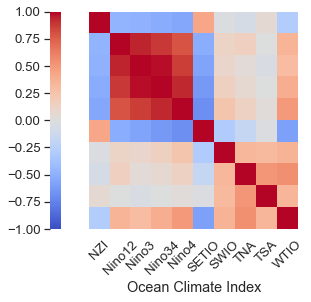

In [61]:
sns.set(font_scale=1.2)
fig,ax = plt.subplots(figsize=(5,4))
#plt.figure(figsize=(5,4))
sns.heatmap(df_lens.corr(), ax=ax, vmin=-1, vmax=1, cmap='coolwarm', cbar_kws = dict(use_gridspec=False,location="left"))
plt.xticks(rotation=45)
plt.yticks([])
plt.ylabel('')
ax.tick_params(left=False, bottom=False)

In [89]:
import statsmodels.api as sm

In [186]:
lin_reg = sm.OLS(y, preprocessing.scale(X_lens)).fit()
err_series = lin_reg.params - lin_reg.conf_int()[:,0]
err_series

array([0.03714626, 0.13602006, 0.34444837, 0.32816128, 0.1215542 ,
       0.04679792, 0.03463121, 0.04314903, 0.03689567, 0.04973092])

In [187]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.387
Method:                 Least Squares   F-statistic:                              167.6
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                   7.27e-273
Time:                        11:23:38   Log-Likelihood:                         -3095.1
No. Observations:                2640   AIC:                                      6210.
Df Residuals:                    2630   BIC:                                      6269.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1076      0.019     -5.680      0.000      -0.145      -0.070
x2             0.9854      0.069     14.205      0.000       0.849       1.121
x3            -2.8114      0.176    -16.004      0.000      -3.156      -2.467
x4             2.2002      0.167     13.147      0.000       1.872       2.528
x5            -0.3109      0.062     -5.015      0.000      -0.432      -0.189
x6             0.0026      0.024      0.109      0.913      -0.044       0.049
x7            -0.0109      0.018     -0.616      0.538      -0.046       0.024
x8             0.2742      0.022     12.460      0.000       0.231       0.317
x9            -0.0873      0.019     -4.637      0.000      -0.124      -0.050
x10            0.1418      0.025      5.592      0.000       0.092       0.192
==============================================================================
Omnibus:                      156.980   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.927
Skew:                           0.551   Prob(JB):                     1.92e-45
Kurtosis:                       3.812   Cond. No.                         35.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
coef_df = pd.DataFrame({'coef': lin_reg.params,
                        'err': err_series,
                        'varname': df_lens.columns
                       })
coef_df

,coef,err,varname
0,-0.107610,0.037146,NZI
1,0.985393,0.136020,Nino12
2,-2.811353,0.344448,Nino3
3,2.200235,0.328161,Nino34
4,-0.310908,0.121554,Nino4
5,0.002608,0.046798,SETIO
6,-0.010885,0.034631,SWIO
7,0.274190,0.043149,TNA
8,-0.087259,0.036896,TSA
9,0.141827,0.049731,WTIO


In [216]:
j = 0
linreg = sm.OLS(y, X_lens[:, [j]]).fit()
err_series = linreg.params - linreg.conf_int()[:,0]

In [212]:
linreg.params[0]

-0.2635183452067577

In [218]:
err_series[0]

0.03988922568055392

In [220]:
climix = df_lens.columns

results = []

for j in range(X_lens.shape[1]):
    lin_reg = sm.OLS(y, X_lens[:, [j]]).fit()
    err_series = lin_reg.params - lin_reg.conf_int()[:,0]

    results.append([climix[j], lin_reg.params[0], err_series[0]])

In [233]:
coef_df_solo = pd.DataFrame(results, columns=['varname', 'coef', 'err'])
coef_df_solo

,varname,coef,err
0,NZI,-0.263518,0.039889
1,Nino12,0.184126,0.037224
2,Nino3,0.100616,0.037475
3,Nino34,0.162469,0.037101
4,Nino4,0.247192,0.037498
5,SETIO,-0.251422,0.037454
6,SWIO,0.228573,0.041534
7,TNA,0.467331,0.032974
8,TSA,0.185714,0.039389
9,WTIO,0.493475,0.034644


In [234]:
lin_reg.conf_int()

array([[0.45883113, 0.52811875]])

Text(0.5, 0, 'OLS coefficients')

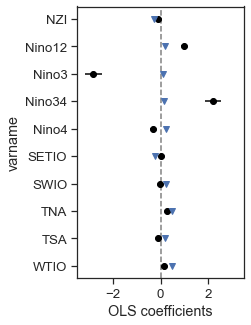

In [246]:

sns.set(style="ticks", font_scale=1.2)

plt.figure(figsize=(3,5))
sns.scatterplot(x='coef', y='varname', data=coef_df)
plt.errorbar(coef_df.coef, coef_df.varname, xerr=coef_df.err, fmt='o', c='black')

#sns.scatterplot(x='coef', y='varname', data=coef_df_solo)
plt.errorbar(coef_df_solo.coef, coef_df_solo.varname, xerr=coef_df_solo.err, fmt='v')


plt.axvline(0, **{'ls':'--', 'c':'grey'})
plt.xlim([-3.5, 3.5])
plt.xlabel('OLS coefficients')

In [58]:
lg = linear_model.LinearRegression()
lg.fit(X_train, y_train)

print(r2_score(y_test, lg.predict(X_test)))

df_all = pd.DataFrame([x for x in zip(df_lens.columns, lg.coef_)], columns=['climate index', 'coef'])

0.38267424073132716


In [62]:
lg = linear_model.LinearRegression()
climix = df_lens.columns

results = []

for j in range(X_lens.shape[1]):
    lg.fit(X_train[:, [j]], y_train)
    results.append([climix[j], lg.coef_[0], r2_score(y_test, lg.predict(X_test[:, [j]]))])

In [63]:
df_solo = pd.DataFrame(results, columns=['climate index', 'OLS coef', 'test $R^2$'])

In [81]:
df_all = pd.merge(df_all, df_solo)

<AxesSubplot:xlabel='climate index'>

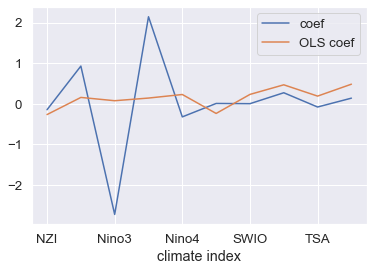

In [88]:
df_all.set_index('climate index').drop(columns=['test $R^2$']).plot()

<AxesSubplot:xlabel='var', ylabel='vi'>

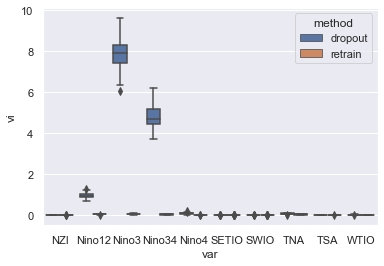

In [65]:
lg = linear_model.LinearRegression()
res = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X_lens, y, shuffle=True)
    lg.fit(X_train, y_train)
    full_r2 = r2_score(y_test, lg.predict(X_test))
    #X_train, X_test, y_train, y_test = (X, X, y, y)
    for j in range(X_train.shape[1]):
        lgj = linear_model.LinearRegression()
        Xj_train = dropout(X_train, j)
        Xj_test = dropout(X_test, j)

        #dropout
        res.append([climix[j], 'dropout', mse(y_test, lg.predict(Xj_test)) - mse(y_test, lg.predict(X_test)), 
                    r2_score(y_test, lg.predict(Xj_test)), full_r2])

        #retrain
        lgj.fit(Xj_train, y_train)
        res.append([climix[j], 'retrain', mse(y_test, lgj.predict(Xj_test)) - mse(y_test, lg.predict(X_test)), 
                    r2_score(y_test, lgj.predict(Xj_test)), full_r2])
        
res = pd.DataFrame(res, columns=['var', 'method', 'vi', 'reduced_r2', 'full_r2'])
sns.boxplot(x='var', y='vi', hue='method', data=res)

In [62]:
n, p = X_lens.shape
hidden_layers = [12]
tol = 1e-3
results = []

Xix = torch.tensor(X_lens, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1,1)

X_train, X_test, y_train, y_test = train_test_split(Xix, y, test_size = 0.33, shuffle=True)
trainset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                          torch.tensor(y_train, dtype=torch.float32).view(-1,1))
train_loader = DataLoader(trainset, batch_size=256)

full_nn = NN4vi(p, hidden_layers, 1)
#tb_logger = pl.loggers.TensorBoardLogger('logs/{}'.format(exp_name), name='full')#, default_hp_metric=False)
early_stopping = EarlyStopping('val_loss', min_delta=tol)
trainer = pl.Trainer(callbacks=[early_stopping])
t0 = time.time()
trainer.fit(full_nn, train_loader, train_loader)
full_time = time.time() - t0
full_pred_test = full_nn(X_test)
results.append(['all', 'full model', full_time, 0,
                nn.MSELoss()(full_nn(X_train), y_train).item(),
                nn.MSELoss()(full_pred_test, y_test).item()])

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 145   
------------------------------------
145       Trainable params
0         Non-trainable params
145       Total params


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [63]:
r2_score(y_test, full_nn(X_test).detach().numpy())

0.3249427338670292

In [64]:
np.sqrt(1768)

42.04759208325728

In [65]:
df = pd.DataFrame()
for t in range(10):
    tmp = vi_experiment_wrapper(torch.tensor(Xix, dtype=torch.float32), 
                           torch.tensor(y, dtype=torch.float32), 50, np.arange(10), t, lambda_path=np.logspace(1, 3, 10))
    tmp['iter'] = t
    df = df.append(tmp, ignore_index=True)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


77.4263682681127
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


46.41588833612777
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


77.4263682681127
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


46.41588833612777
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


46.41588833612777
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


215.44346900318823
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


359.38136638046257
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


77.4263682681127
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


77.4263682681127
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


599.4842503189409
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


129.1549665014884
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0
(1768, 601)


GPU available: False, used: False
TPU available: None, using: 0 TPU cores

  | Name | Type       | Params
------------------------------------
0 | net  | Sequential | 601   
------------------------------------
601       Trainable params
0         Non-trainable params
601       Total params


1000.0


In [67]:
df.to_csv('../results/climate_indices_iter10.csv')

In [68]:
climap = {f'X{str(j+1)}':df_lens.columns[j] for j in range(10)}

df['method'] = df.method.apply(lambda x: x.title())
df.loc[df.method == 'Lazy', 'method'] = 'LazyVI'
df2 = df[df.variable!='all']
df2['OCI'] = df2.variable.map(climap)


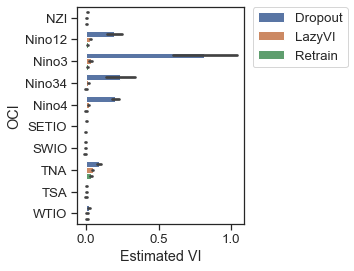

In [69]:
sns.set(style="ticks", font_scale=1.2)
plt.figure(figsize=(3,4))
df2['log_vi'] = np.log10(df.vi)
sns.barplot(x='vi', y='OCI', hue='method', data=df2)#, join=False, scale=.5)
plt.xlabel('Estimated VI')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='variable', ylabel='vi'>

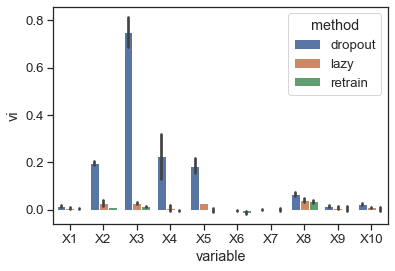

In [257]:
sns.barplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

In [265]:
df.to_csv('../results/climate_indices_v1.csv', index=False)

In [19]:
df = pd.read_csv('../results/climate_indices_v1.csv')